In [80]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [81]:
f = h5py.File('/sdf/group/neutrino/sfogarty/ND_prototype_files/protons_10000_events_2x2_1MeV_to_300MeV_larndsim_lightTruth.h5','r')
f.keys()

<KeysViewHDF5 ['_header', 'configs', 'light_dat', 'light_trig', 'light_wvfm', 'mc_light_trig_assn', 'mc_packets_assn', 'messages', 'packets', 'segments', 'trajectories']>

In [82]:
mc_light_trig_assn = np.array(f['mc_light_trig_assn'])

In [99]:
proton_traj = f['trajectories'][f['trajectories']['local_traj_id'] == 0]
event_id = proton_traj['event_id']
p_mag_traj = np.sqrt(np.sum(proton_traj['pxyz_start']**2,axis=1))
energy = np.sqrt(938.272*938.272 + p_mag_traj**2) - 938.272

Text(0.5, 0, 'Proton Energy [MeV]')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
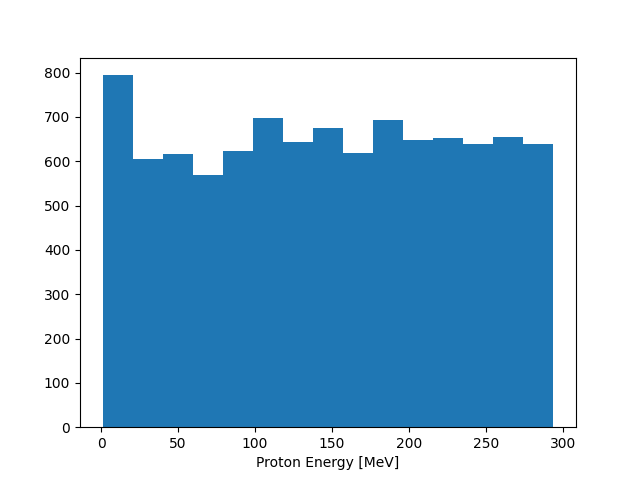

In [100]:
%matplotlib widget
plt.hist(energy,bins=15)
plt.xlabel('Proton Energy [MeV]')

Text(0.5, 1.0, 'Protons simulated in larnd-sim (1 MeV to 300 MeV)')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
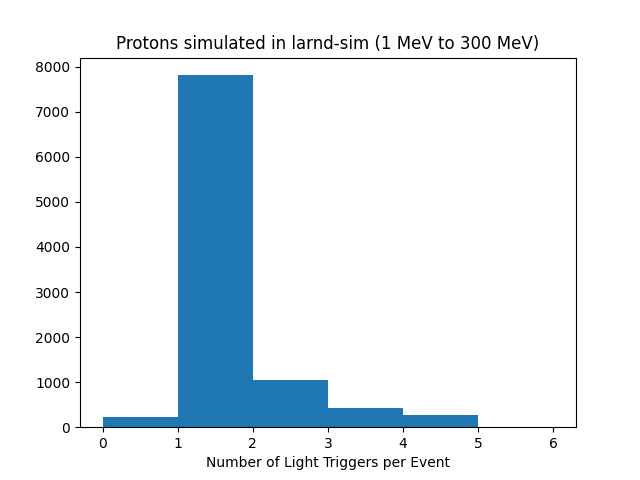

In [101]:
trig_count_bincount = np.bincount(mc_light_trig_assn)[event_id]
%matplotlib widget
plt.hist(trig_count_bincount, range=(0,6), bins=6)
plt.xlabel('Number of Light Triggers per Event')
plt.title('Protons simulated in larnd-sim (1 MeV to 300 MeV)')



(0.0, 300.0)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
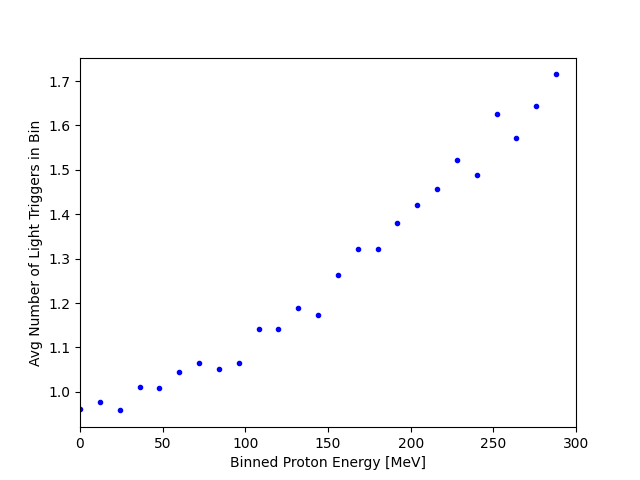

In [105]:
trig_count = trig_count_bincount
from scipy import stats
nbins = 25
values = stats.binned_statistic(energy, trig_count, 'mean', bins=nbins, range=(0,300))
#values_std = stats.binned_statistic(energy, trig_count, 'std', bins=nbins, range=(0,300))
values_count = stats.binned_statistic(energy, trig_count, 'count', bins=nbins, range=(0,300))

%matplotlib widget
plt.plot(values[1][:-1], values[0], 'bo', markersize=3)
#plt.errorbar(values_std[1][:-1], values[0], yerr=values_std[0])
plt.xlabel('Binned Proton Energy [MeV]')
plt.ylabel('Avg Number of Light Triggers in Bin')
plt.xlim(0, 300)